In [5]:
import pandas as pd
import numpy as np
import os
import sys
df= pd.read_csv(r"C:\Users\ASUS\Desktop\SCANIA\2024-34-2\Code\super_diff_norm.csv")

# PREPROCESS

In [6]:
# print(df.columns)

df.drop("row_number", axis=1, inplace=True)
for i in df.columns:
    print(i)


vehicle_id
time_step
171_0
666_0
427_0
837_0
167_0
167_1
167_2
167_3
167_4
167_5
167_6
167_7
167_8
167_9
309_0
272_0
272_1
272_2
272_3
272_4
272_5
272_6
272_7
272_8
272_9
835_0
370_0
291_0
291_1
291_2
291_3
291_4
291_5
291_6
291_7
291_8
291_9
291_10
158_0
158_1
158_2
158_3
158_4
158_5
158_6
158_7
158_8
158_9
100_0
459_0
459_1
459_2
459_3
459_4
459_5
459_6
459_7
459_8
459_9
459_10
459_11
459_12
459_13
459_14
459_15
459_16
459_17
459_18
459_19
397_0
397_1
397_2
397_3
397_4
397_5
397_6
397_7
397_8
397_9
397_10
397_11
397_12
397_13
397_14
397_15
397_16
397_17
397_18
397_19
397_20
397_21
397_22
397_23
397_24
397_25
397_26
397_27
397_28
397_29
397_30
397_31
397_32
397_33
397_34
397_35
in_study_repair
class_label
RUL


In [7]:

# dr=pd.read_csv(r"C:\Users\ASUS\Desktop\SCANIA\2024-34-2\2024-34-2\data\train_operational_readouts.csv")
# filtered_df = dr[dr['vehicle_id'].isin([186])]
# last_3_rows = filtered_df.groupby('vehicle_id').head(60)

# # Display the result
# (last_3_rows)


In [8]:
# import pandas as pd
# import numpy as np
# import torch
# from torch.utils.data import Dataset

# # Features to include in X
# sensor_features = [
#     '171_0', '666_0', '427_0', '837_0', '167_0', '167_1', '167_2', '167_3', '167_4', '167_5', '167_6', '167_7',
#     '167_8', '167_9', '309_0', '272_0', '272_1', '272_2', '272_3', '272_4', '272_5', '272_6', '272_7', '272_8', '272_9',
#     '835_0', '370_0', '291_0', '291_1', '291_2', '291_3', '291_4', '291_5', '291_6', '291_7', '291_8', '291_9', '291_10',
#     '158_0', '158_1', '158_2', '158_3', '158_4', '158_5', '158_6', '158_7', '158_8', '158_9', '100_0',
#     '459_0', '459_1', '459_2', '459_3', '459_4', '459_5', '459_6', '459_7', '459_8', '459_9', '459_10', '459_11',
#     '459_12', '459_13', '459_14', '459_15', '459_16', '459_17', '459_18', '459_19',
#     '397_0', '397_1', '397_2', '397_3', '397_4', '397_5', '397_6', '397_7', '397_8', '397_9',
#     '397_10', '397_11', '397_12', '397_13', '397_14', '397_15', '397_16', '397_17', '397_18', '397_19',
#     '397_20', '397_21', '397_22', '397_23', '397_24', '397_25', '397_26', '397_27', '397_28', '397_29',
#     '397_30', '397_31', '397_32', '397_33', '397_34', '397_35'
# ]

# def create_X_y(csv_path, context=100, verbose=True):
#     df = pd.read_csv(csv_path)
#     X = []
#     y = []
    
#     for vehicle_id, group in df.groupby('vehicle_id'):
#         group = group.sort_values('time_step')
#         data = group[sensor_features].values
#         rul = group['RUL'].values

#         if len(data) < context:
#             if verbose:
#                 print(f"Skipping vehicle_id {vehicle_id} due to insufficient length ({len(data)}<{context})")
#             continue

#         for i in range(len(data) - context + 1):
#             X.append(data[i:i+context])
#             y.append(rul[i+context-1])  # Predict RUL at the end of the sequence

#     print(f"Total sequences: {len(X)}, Shape of each input: {np.array(X[0]).shape}")
#     return X, y

# class TimeSeriesDataset(Dataset):
#     def __init__(self, X, y):
#         self.X = X
#         self.y = y
#         assert len(X) == len(y)

#     def __len__(self):
#         return len(self.X)

#     def __getitem__(self, idx):
#         return torch.FloatTensor(self.X[idx]), torch.FloatTensor([self.y[idx]])

# # Example usage
# csv_path = r"C:\Users\ASUS\Desktop\SCANIA\2024-34-2\Code\super_diff_norm.csv"
# X_train, y_train = create_X_y(csv_path, context=100)
# train_dataset = TimeSeriesDataset(X_train, y_train)


In [9]:
import pandas as pd

# Load your dataset
csv_path = r"C:\Users\ASUS\Desktop\SCANIA\2024-34-2\Code\test_super_diff_norm.csv"
df = pd.read_csv(csv_path)

# Initialize results dictionary
vehicle_counts = {}

# Loop through thresholds from 10 to 150 (step 10)
for threshold in range(10, 151, 10):
    count = df.groupby('vehicle_id').filter(lambda x: len(x) > threshold)['vehicle_id'].nunique()
    vehicle_counts[f"> {threshold}"] = count

# Display the results
print("Number of vehicles with more than X rows:\n")
for k, v in vehicle_counts.items():
    print(f"{k} timesteps: {v} vehicles")


Number of vehicles with more than X rows:

> 10 timesteps: 138 vehicles
> 20 timesteps: 107 vehicles
> 30 timesteps: 77 vehicles
> 40 timesteps: 49 vehicles
> 50 timesteps: 32 vehicles
> 60 timesteps: 23 vehicles
> 70 timesteps: 15 vehicles
> 80 timesteps: 5 vehicles
> 90 timesteps: 3 vehicles
> 100 timesteps: 1 vehicles
> 110 timesteps: 0 vehicles
> 120 timesteps: 0 vehicles
> 130 timesteps: 0 vehicles
> 140 timesteps: 0 vehicles
> 150 timesteps: 0 vehicles


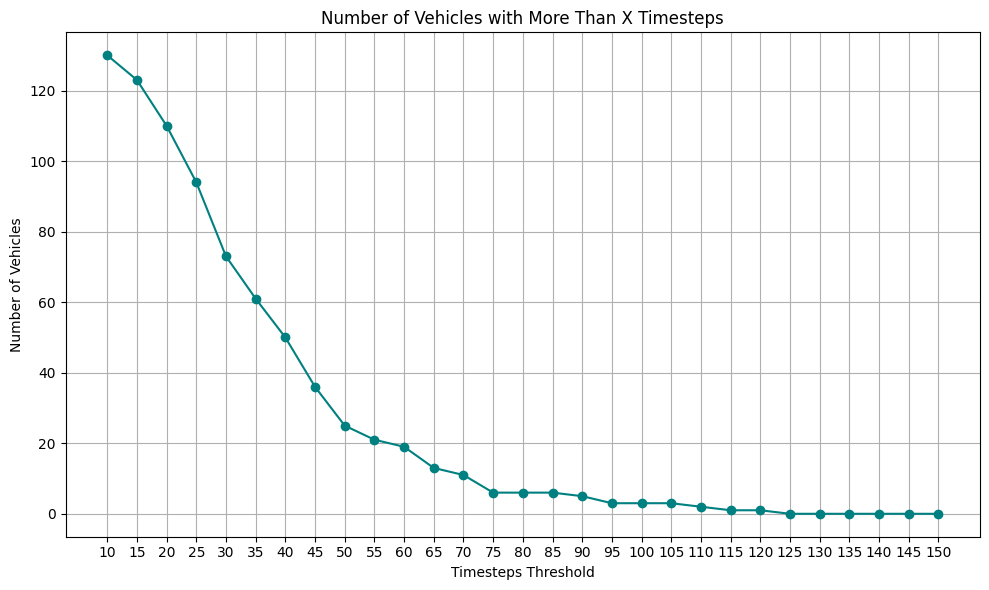

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
csv_path = r"C:\Users\ASUS\Desktop\SCANIA\2024-34-2\Code\validation_super_diff_norm.csv"
df = pd.read_csv(csv_path)

# Count vehicles above thresholds
thresholds = list(range(10, 151, 5))
counts = []

for threshold in thresholds:
    count = df.groupby('vehicle_id').filter(lambda x: len(x) > threshold)['vehicle_id'].nunique()
    counts.append(count)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, counts, marker='o', linestyle='-', color='teal')
plt.title("Number of Vehicles with More Than X Timesteps")
plt.xlabel("Timesteps Threshold")
plt.ylabel("Number of Vehicles")
plt.grid(True)
plt.xticks(thresholds)
plt.tight_layout()
plt.show()


In [11]:

import numpy as np  # Importing numpy for additional operations

x = []
for vehicle_id, group in df.groupby('vehicle_id'):
    group = group.sort_values('time_step')  # Sorting by 'time_step'
    data = group[sensor_features].values   # Extracting sensor features as an array
    x.append(len(data))                    # Appending the length of the data

# Convert the list 'x' to a numpy array for statistical operations
x = np.array(x)

# Calculate minimum, average, and maximum lengths
x_min = x.min()
x_avg = x.mean()  # Using 'mean()' for average
x_max = x.max()
x_median = np.median(x) 
print("Minimum length:", x_min)
print("Average length:", x_avg)
print("Median length:", x_median)  # Printing the median length
print("Maximum length:", x_max)


Minimum length: 7
Average length: 37.330882352941174
Median length: 31.5
Maximum length: 124


In [1]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset

# Features to include in X
sensor_features = [
    '171_0', '666_0', '427_0', '837_0', '167_0', '167_1', '167_2', '167_3', '167_4', '167_5', '167_6', '167_7',
    '167_8', '167_9', '309_0', '272_0', '272_1', '272_2', '272_3', '272_4', '272_5', '272_6', '272_7', '272_8', '272_9',
    '835_0', '370_0', '291_0', '291_1', '291_2', '291_3', '291_4', '291_5', '291_6', '291_7', '291_8', '291_9', '291_10',
    '158_0', '158_1', '158_2', '158_3', '158_4', '158_5', '158_6', '158_7', '158_8', '158_9', '100_0',
    '459_0', '459_1', '459_2', '459_3', '459_4', '459_5', '459_6', '459_7', '459_8', '459_9', '459_10', '459_11',
    '459_12', '459_13', '459_14', '459_15', '459_16', '459_17', '459_18', '459_19',
    '397_0', '397_1', '397_2', '397_3', '397_4', '397_5', '397_6', '397_7', '397_8', '397_9',
    '397_10', '397_11', '397_12', '397_13', '397_14', '397_15', '397_16', '397_17', '397_18', '397_19',
    '397_20', '397_21', '397_22', '397_23', '397_24', '397_25', '397_26', '397_27', '397_28', '397_29',
    '397_30', '397_31', '397_32', '397_33', '397_34', '397_35'
]

def create_X_y(csv_path, context=70, verbose=True):
    df = pd.read_csv(csv_path)
    X = []
    y = []
    
    for vehicle_id, group in df.groupby('vehicle_id'):
        group = group.sort_values('time_step')
        data = group[sensor_features].values
        rul = group['RUL'].values

        if len(data) < context:
            if verbose:
                print(f"Skipping vehicle_id {vehicle_id} due to insufficient length ({len(data)}<{context})")
            continue

        for i in range(len(data) - context + 1):
            X.append(data[i:i+context])
            y.append(rul[i+context-1])  # Predict RUL at the end of the sequence

    print(f"Total sequences: {len(X)}, Shape of each input: {np.array(X[0]).shape}")
    return X, y

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        assert len(X) == len(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return torch.FloatTensor(self.X[idx]), torch.FloatTensor([self.y[idx]])

# Example usage
csv_path = r"C:\Users\ASUS\Desktop\SCANIA\2024-34-2\Code\super_same_norm.csv"
X_train, y_train = create_X_y(csv_path, context=70)
train_dataset = TimeSeriesDataset(X_train, y_train)


Skipping vehicle_id 22 due to insufficient length (51<70)
Skipping vehicle_id 29 due to insufficient length (44<70)
Skipping vehicle_id 67 due to insufficient length (57<70)
Skipping vehicle_id 75 due to insufficient length (56<70)
Skipping vehicle_id 79 due to insufficient length (38<70)
Skipping vehicle_id 95 due to insufficient length (32<70)
Skipping vehicle_id 186 due to insufficient length (9<70)
Skipping vehicle_id 246 due to insufficient length (66<70)
Skipping vehicle_id 336 due to insufficient length (61<70)
Skipping vehicle_id 351 due to insufficient length (69<70)
Skipping vehicle_id 358 due to insufficient length (30<70)
Skipping vehicle_id 368 due to insufficient length (27<70)
Skipping vehicle_id 370 due to insufficient length (66<70)
Skipping vehicle_id 386 due to insufficient length (48<70)
Skipping vehicle_id 410 due to insufficient length (43<70)
Skipping vehicle_id 430 due to insufficient length (68<70)
Skipping vehicle_id 457 due to insufficient length (19<70)
Skip

In [6]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset

# Features to include in X
sensor_features = [
    '171_0', '666_0', '427_0', '837_0', '167_0', '167_1', '167_2', '167_3', '167_4', '167_5', '167_6', '167_7',
    '167_8', '167_9', '309_0', '272_0', '272_1', '272_2', '272_3', '272_4', '272_5', '272_6', '272_7', '272_8', '272_9',
    '835_0', '370_0', '291_0', '291_1', '291_2', '291_3', '291_4', '291_5', '291_6', '291_7', '291_8', '291_9', '291_10',
    '158_0', '158_1', '158_2', '158_3', '158_4', '158_5', '158_6', '158_7', '158_8', '158_9', '100_0',
    '459_0', '459_1', '459_2', '459_3', '459_4', '459_5', '459_6', '459_7', '459_8', '459_9', '459_10', '459_11',
    '459_12', '459_13', '459_14', '459_15', '459_16', '459_17', '459_18', '459_19',
    '397_0', '397_1', '397_2', '397_3', '397_4', '397_5', '397_6', '397_7', '397_8', '397_9',
    '397_10', '397_11', '397_12', '397_13', '397_14', '397_15', '397_16', '397_17', '397_18', '397_19',
    '397_20', '397_21', '397_22', '397_23', '397_24', '397_25', '397_26', '397_27', '397_28', '397_29',
    '397_30', '397_31', '397_32', '397_33', '397_34', '397_35'
]

def create_X_y(csv_path, context=70, verbose=True):
    df = pd.read_csv(csv_path)
    X = []
    y = []
    
    for vehicle_id, group in df.groupby('vehicle_id'):
        group = group.sort_values('time_step')
        data = group[sensor_features].values
        rul = group['RUL'].values

        if len(data) < context:
            if verbose:
                print(f"Skipping vehicle_id {vehicle_id} due to insufficient length ({len(data)}<{context})")
            continue

        for i in range(len(data) - context + 1):
            X.append(data[i:i+context])
            y.append(rul[i+context-1])  # Predict RUL at the end of the sequence

    print(f"Total sequences: {len(X)}, Shape of each input: {np.array(X[0]).shape}")
    return X, y

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        assert len(X) == len(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return torch.FloatTensor(self.X[idx]), torch.FloatTensor([self.y[idx]])

# Example usage
csv_path = r"C:\Users\ASUS\Desktop\SCANIA\2024-34-2\Code\validation_super_same_norm.csv"
X_valid, y_valid = create_X_y(csv_path, context=70)
valid_dataset = TimeSeriesDataset(X_valid, y_valid)


Skipping vehicle_id 189 due to insufficient length (61<70)
Skipping vehicle_id 940 due to insufficient length (61<70)
Skipping vehicle_id 1327 due to insufficient length (17<70)
Skipping vehicle_id 2061 due to insufficient length (64<70)
Skipping vehicle_id 2656 due to insufficient length (20<70)
Skipping vehicle_id 2803 due to insufficient length (50<70)
Skipping vehicle_id 3022 due to insufficient length (29<70)
Skipping vehicle_id 3074 due to insufficient length (16<70)
Skipping vehicle_id 3298 due to insufficient length (43<70)
Skipping vehicle_id 3309 due to insufficient length (32<70)
Skipping vehicle_id 3344 due to insufficient length (43<70)
Skipping vehicle_id 3649 due to insufficient length (22<70)
Skipping vehicle_id 3669 due to insufficient length (24<70)
Skipping vehicle_id 3816 due to insufficient length (22<70)
Skipping vehicle_id 4257 due to insufficient length (31<70)
Skipping vehicle_id 4384 due to insufficient length (24<70)
Skipping vehicle_id 4810 due to insufficie

# LSTM

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

# Define the LSTM-based regression model
class LSTMRegressor(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout):
        super(LSTMRegressor, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size,
                            hidden_size=hidden_size,
                            num_layers=num_layers,
                            batch_first=True,
                            dropout=dropout)
        self.fc = nn.Linear(hidden_size, 1)

    # def forward(self, x):
    #     # x shape: [batch, seq_len, input_size]
    #     out, (hn, cn) = self.lstm(x)  # out: [batch, seq_len, hidden_size]
    #     out = hn[-1]  # Take last hidden state from the last LSTM layer
    #     out = self.fc(out)  # Regression output
    #     return out.squeeze(1)  # Return [batch]
    
    def forward(self, x):
        # x shape: [batch, seq_len, input_size]
        out,_ = self.lstm(x)  # out: [batch, seq_len, hidden_size] 1,70,128
        out = out[:,-1,:]  # Take last hidden state from the last LSTM layer 1,1,128
        out = self.fc(out)  # Regression output 
        return out.squeeze(1)  # Return [batch]






# Hyperparameters
input_size = len(sensor_features)
context_length = 70  # should match the context used earlier
hidden_size = 256
num_layers = 2
dropout = 0
batch_size = 64
epochs = 30
learning_rate = 1e-3

# DataLoader setup
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Model, Loss, Optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMRegressor(input_size=input_size, hidden_size=hidden_size,
                      num_layers=num_layers, dropout=dropout).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# # Training loop
# for epoch in range(epochs):
#     model.train()
#     epoch_loss = 0.0
#     for X_batch, y_batch in train_loader:
#         X_batch, y_batch = X_batch.to(device), y_batch.to(device).squeeze()



#         # print(X_batch.shape, y_batch.shape)


#         optimizer.zero_grad()
#         outputs = model(X_batch)
#         loss = criterion(outputs, y_batch)
#         loss.backward()
#         optimizer.step()

#         epoch_loss += loss.item() * X_batch.size(0)

#     avg_loss = epoch_loss / len(train_loader.dataset)
#     print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")


Epoch [1/30], Loss: 429.5720
Epoch [2/30], Loss: 429.7527
Epoch [3/30], Loss: 429.6603
Epoch [4/30], Loss: 429.8952
Epoch [5/30], Loss: 429.7824
Epoch [6/30], Loss: 429.5624
Epoch [7/30], Loss: 429.6556
Epoch [8/30], Loss: 429.8266
Epoch [9/30], Loss: 429.8249
Epoch [10/30], Loss: 429.6549
Epoch [11/30], Loss: 429.7350
Epoch [12/30], Loss: 429.6623
Epoch [13/30], Loss: 429.7802
Epoch [14/30], Loss: 421.2868
Epoch [15/30], Loss: 351.4615
Epoch [16/30], Loss: 306.2783
Epoch [17/30], Loss: 274.2688
Epoch [18/30], Loss: 255.0722
Epoch [19/30], Loss: 231.7362
Epoch [20/30], Loss: 212.6000
Epoch [21/30], Loss: 191.1863
Epoch [22/30], Loss: 166.1805
Epoch [23/30], Loss: 146.0817
Epoch [24/30], Loss: 153.0303
Epoch [25/30], Loss: 132.5752
Epoch [26/30], Loss: 125.1427
Epoch [27/30], Loss: 118.3274
Epoch [28/30], Loss: 141.8603
Epoch [29/30], Loss: 149.1949
Epoch [30/30], Loss: 137.0626


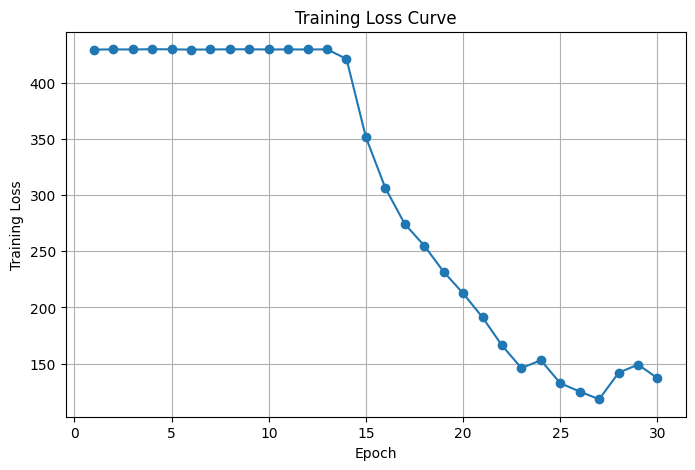

In [ ]:
import matplotlib.pyplot as plt  # Add this import at the top

# Training loop
train_losses = []  # list to store loss per epoch

for epoch in range(epochs):
    model.train()
    epoch_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device).squeeze()

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * X_batch.size(0)

    avg_loss = epoch_loss / len(train_loader.dataset)
    train_losses.append(avg_loss)  # average loss for this epoch
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

# Plot train loss curve after training
plt.figure(figsize=(8,5))
plt.plot(range(1, epochs+1), train_losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Curve')
plt.grid(True)
plt.show()


Epoch [1/30], Train Loss: 103.7505, Valid Loss: 544.5520
Epoch [2/30], Train Loss: 96.8241, Valid Loss: 561.7644
Epoch [3/30], Train Loss: 90.0320, Valid Loss: 562.1879
Epoch [4/30], Train Loss: 79.0471, Valid Loss: 581.6075
Epoch [5/30], Train Loss: 83.8433, Valid Loss: 598.6557
Epoch [6/30], Train Loss: 73.8424, Valid Loss: 565.4421
Epoch [7/30], Train Loss: 57.4368, Valid Loss: 562.5095
Epoch [8/30], Train Loss: 58.2096, Valid Loss: 576.6500
Epoch [9/30], Train Loss: 54.5988, Valid Loss: 576.9168
Epoch [10/30], Train Loss: 55.6058, Valid Loss: 582.4115
Epoch [11/30], Train Loss: 45.6070, Valid Loss: 575.2521
Epoch [12/30], Train Loss: 45.4390, Valid Loss: 589.7514
Epoch [13/30], Train Loss: 50.5754, Valid Loss: 593.4625
Epoch [14/30], Train Loss: 41.1751, Valid Loss: 578.5988
Epoch [15/30], Train Loss: 37.2358, Valid Loss: 577.1769
Epoch [16/30], Train Loss: 40.4207, Valid Loss: 615.4150
Epoch [17/30], Train Loss: 48.9381, Valid Loss: 601.5225
Epoch [18/30], Train Loss: 50.8677, Val

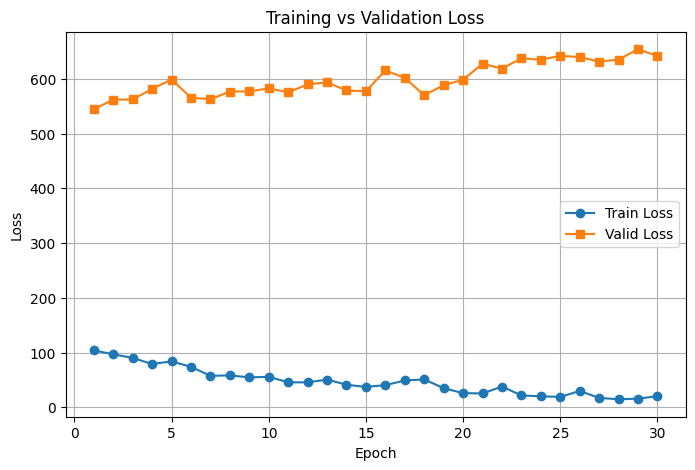

In [7]:
# Validation DataLoader
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

# Training loop
train_losses = []
valid_losses = []

for epoch in range(epochs):
    model.train()
    epoch_train_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device).squeeze()

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        epoch_train_loss += loss.item() * X_batch.size(0)

    avg_train_loss = epoch_train_loss / len(train_loader.dataset)
    train_losses.append(avg_train_loss)

    # Validation loss calculation
    model.eval()
    epoch_valid_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in valid_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device).squeeze()

            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            epoch_valid_loss += loss.item() * X_batch.size(0)

    avg_valid_loss = epoch_valid_loss / len(valid_loader.dataset)
    valid_losses.append(avg_valid_loss)

    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Valid Loss: {avg_valid_loss:.4f}")

# Plot train vs validation loss curve
plt.figure(figsize=(8,5))
plt.plot(range(1, epochs+1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, epochs+1), valid_losses, label='Valid Loss', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


# GRU

In [25]:
import torch
import torch.nn as nn

class GRURegressor(nn.Module):
    def __init__(self, input_size, hidden_size=128, num_layers=2, dropout=0.3):
        super(GRURegressor, self).__init__()
        self.gru = nn.GRU(input_size=input_size,
                          hidden_size=hidden_size,
                          num_layers=num_layers,
                          batch_first=True,
                          dropout=dropout)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        # x: [batch, seq_len, input_size]
        out, hn = self.gru(x)  # out: [batch, seq_len, hidden_size], hn: [num_layers, batch, hidden_size]
        out = hn[-1]  # use the final hidden state
        out = self.fc(out)
        return out.squeeze(1)  # [batch]


In [26]:
# GRU model
model = GRURegressor(input_size=input_size,
                     hidden_size=hidden_size,
                     num_layers=num_layers,
                     dropout=dropout).to(device)

# Loss and optimizer remain the same
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# # Train loop
# for epoch in range(epochs):
#     model.train()
#     epoch_loss = 0.0
#     for X_batch, y_batch in train_loader:
#         X_batch, y_batch = X_batch.to(device), y_batch.to(device).squeeze()

#         optimizer.zero_grad()
#         outputs = model(X_batch)
#         loss = criterion(outputs, y_batch)
#         loss.backward()
#         optimizer.step()

#         epoch_loss += loss.item() * X_batch.size(0)

#     avg_loss = epoch_loss / len(train_loader.dataset)
#     print(f"[GRU] Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")


Epoch [1/30], Loss: 467.8114
Epoch [2/30], Loss: 429.6097
Epoch [3/30], Loss: 429.6726
Epoch [4/30], Loss: 429.8160
Epoch [5/30], Loss: 429.6795
Epoch [6/30], Loss: 429.8542
Epoch [7/30], Loss: 429.9621
Epoch [8/30], Loss: 429.6546
Epoch [9/30], Loss: 429.8295
Epoch [10/30], Loss: 429.5062
Epoch [11/30], Loss: 427.0178
Epoch [12/30], Loss: 402.9920
Epoch [13/30], Loss: 374.9594
Epoch [14/30], Loss: 369.8629
Epoch [15/30], Loss: 317.9864
Epoch [16/30], Loss: 373.8015
Epoch [17/30], Loss: 423.9733
Epoch [18/30], Loss: 395.0443
Epoch [19/30], Loss: 345.9015
Epoch [20/30], Loss: 326.3433
Epoch [21/30], Loss: 305.8731
Epoch [22/30], Loss: 270.8951
Epoch [23/30], Loss: 269.8319
Epoch [24/30], Loss: 247.8058
Epoch [25/30], Loss: 222.4003
Epoch [26/30], Loss: 219.3170
Epoch [27/30], Loss: 221.3505
Epoch [28/30], Loss: 241.2949
Epoch [29/30], Loss: 199.2327
Epoch [30/30], Loss: 186.7754


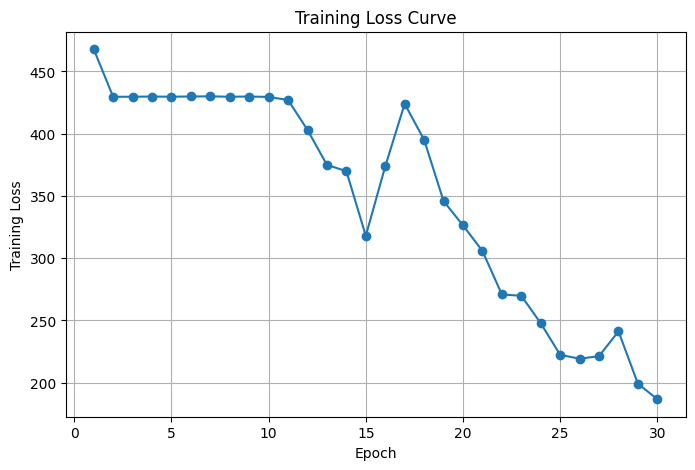

In [10]:
import matplotlib.pyplot as plt  # Add this import at the top

# Training loop
train_losses = []  # list to store loss per epoch

for epoch in range(epochs):
    model.train()
    epoch_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device).squeeze()

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * X_batch.size(0)

    avg_loss = epoch_loss / len(train_loader.dataset)
    train_losses.append(avg_loss)  # average loss for this epoch
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

# Plot train loss curve after training
plt.figure(figsize=(8,5))
plt.plot(range(1, epochs+1), train_losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Curve')
plt.grid(True)
plt.show()


Epoch [1/30], Train Loss: 469.1709, Valid Loss: 191.1421
Epoch [2/30], Train Loss: 429.5814, Valid Loss: 191.2846
Epoch [3/30], Train Loss: 429.5604, Valid Loss: 191.1482
Epoch [4/30], Train Loss: 429.4503, Valid Loss: 192.0230
Epoch [5/30], Train Loss: 429.3142, Valid Loss: 191.1448
Epoch [6/30], Train Loss: 429.5450, Valid Loss: 191.0673
Epoch [7/30], Train Loss: 428.6832, Valid Loss: 194.9537
Epoch [8/30], Train Loss: 421.1804, Valid Loss: 199.0804
Epoch [9/30], Train Loss: 401.6530, Valid Loss: 205.6483
Epoch [10/30], Train Loss: 375.2856, Valid Loss: 249.9989
Epoch [11/30], Train Loss: 332.6954, Valid Loss: 264.5480
Epoch [12/30], Train Loss: 303.9717, Valid Loss: 349.7509
Epoch [13/30], Train Loss: 259.6699, Valid Loss: 279.5493
Epoch [14/30], Train Loss: 235.0819, Valid Loss: 809.4777
Epoch [15/30], Train Loss: 214.6122, Valid Loss: 380.2032
Epoch [16/30], Train Loss: 193.1610, Valid Loss: 1002.2700
Epoch [17/30], Train Loss: 179.4935, Valid Loss: 1207.0464
Epoch [18/30], Train 

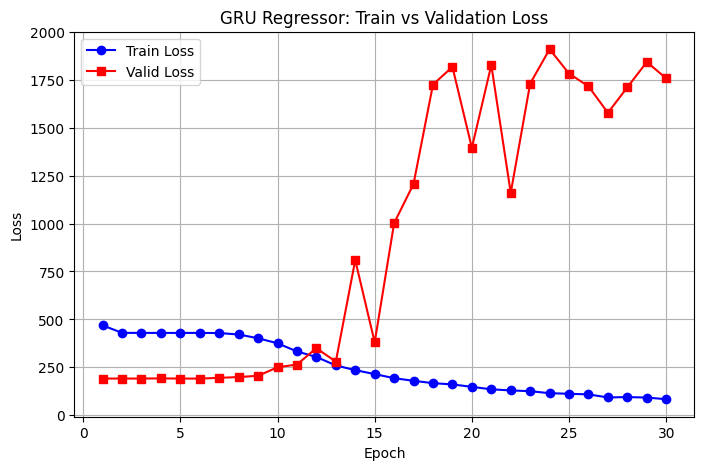

In [27]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# DataLoaders (assuming you already have train_dataset and valid_dataset)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

# GRU Model setup
model = GRURegressor(input_size=input_size,
                     hidden_size=hidden_size,
                     num_layers=num_layers,
                     dropout=dropout).to(device)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
train_losses = []
valid_losses = []

for epoch in range(epochs):
    model.train()
    epoch_train_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device).squeeze()

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        epoch_train_loss += loss.item() * X_batch.size(0)

    avg_train_loss = epoch_train_loss / len(train_loader.dataset)
    train_losses.append(avg_train_loss)

    # Validation loss calculation
    model.eval()
    epoch_valid_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in valid_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device).squeeze()

            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            epoch_valid_loss += loss.item() * X_batch.size(0)

    avg_valid_loss = epoch_valid_loss / len(valid_loader.dataset)
    valid_losses.append(avg_valid_loss)

    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Valid Loss: {avg_valid_loss:.4f}")

# Plotting Train vs Validation Loss
plt.figure(figsize=(8,5))
plt.plot(range(1, epochs+1), train_losses, label='Train Loss', marker='o', color='blue')
plt.plot(range(1, epochs+1), valid_losses, label='Valid Loss', marker='s', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('GRU Regressor: Train vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


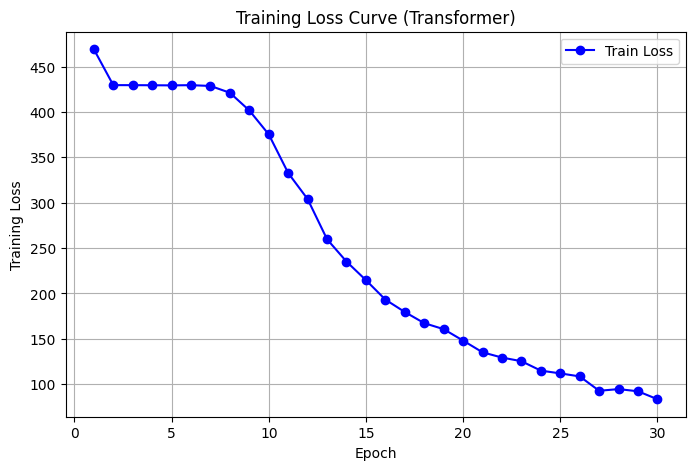

In [28]:
# Plot only Train Loss curve
plt.figure(figsize=(8,5))
plt.plot(range(1, epochs+1), train_losses, label='Train Loss', marker='o', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Curve (Transformer)')
plt.legend()
plt.grid(True)
plt.show()


# Transformer

In [ ]:
import torch
import torch.nn as nn

class TransformerRegressor(nn.Module):
    def __init__(self, input_dim, model_dim=128, num_heads=4, num_layers=2, dropout=0.1):
        super(TransformerRegressor, self).__init__()

        self.model_dim = model_dim

        self.input_projection = nn.Linear(input_dim, model_dim)
        self.positional_encoding = PositionalEncoding(model_dim)

        encoder_layer = nn.TransformerEncoderLayer(d_model=model_dim, nhead=num_heads, dropout=dropout, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.regressor = nn.Sequential(
            nn.Linear(model_dim, 64), 
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        x = self.input_projection(x)
        x = self.positional_encoding(x)
        x = self.transformer_encoder(x)
        # Use the last timestep's output
        return self.regressor(x[:, -1, :])

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super().__init__()
        pe = torch.zeros(max_len, d_model).float()
        position = torch.arange(0, max_len).float().unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(np.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)  # (1, max_len, d_model)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:, :x.size(1)]


In [20]:
from torch.utils.data import DataLoader
import torch.optim as optim

# Data loader
batch_size = 256
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Initialize model
input_dim = len(sensor_features)
model = TransformerRegressor(input_dim=input_dim)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Loss & Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 30
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs} - Loss: {running_loss / len(train_loader):.4f}")


Epoch 1/30 - Loss: 601.4405
Epoch 2/30 - Loss: 439.8148
Epoch 3/30 - Loss: 427.9156
Epoch 4/30 - Loss: 408.2059
Epoch 5/30 - Loss: 362.4502
Epoch 6/30 - Loss: 309.3605
Epoch 7/30 - Loss: 277.8084
Epoch 8/30 - Loss: 257.5693
Epoch 9/30 - Loss: 240.5548
Epoch 10/30 - Loss: 212.3029
Epoch 11/30 - Loss: 202.7874
Epoch 12/30 - Loss: 205.0468
Epoch 13/30 - Loss: 199.8564
Epoch 14/30 - Loss: 189.9536
Epoch 15/30 - Loss: 187.2136
Epoch 16/30 - Loss: 187.7784
Epoch 17/30 - Loss: 185.5776
Epoch 18/30 - Loss: 183.1470
Epoch 19/30 - Loss: 196.2140
Epoch 20/30 - Loss: 188.8695
Epoch 21/30 - Loss: 181.3501
Epoch 22/30 - Loss: 175.5036
Epoch 23/30 - Loss: 179.6666
Epoch 24/30 - Loss: 174.8956
Epoch 25/30 - Loss: 166.2608
Epoch 26/30 - Loss: 158.9756
Epoch 27/30 - Loss: 149.0153
Epoch 28/30 - Loss: 132.5451
Epoch 29/30 - Loss: 127.9630
Epoch 30/30 - Loss: 129.6496


In [16]:
torch.cuda.is_available()

True

In [ ]:
# from torch.utils.data import DataLoader
# import torch.optim as optim

# # Data loader
# batch_size = 256
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# # Initialize model
# input_dim = len(sensor_features)
# model = TransformerRegressor(input_dim=input_dim)
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)

# # Loss & Optimizer
# criterion = nn.MSELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# # Training loop
# epochs = 5
# for epoch in range(epochs):
#     model.train()
#     running_loss = 0.0
#     for X_batch, y_batch in train_loader:
#         X_batch, y_batch = X_batch.to(device), y_batch.to(device)

#         optimizer.zero_grad()
#         outputs = model(X_batch)
#         loss = criterion(outputs, y_batch)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()

#     print(f"Epoch {epoch+1}/{epochs} - Loss: {running_loss / len(train_loader):.4f}")


Epoch 1/5 - Loss: 688.2471
Epoch 2/5 - Loss: 500.8485
Epoch 3/5 - Loss: 429.8967
Epoch 4/5 - Loss: 423.7926
Epoch 5/5 - Loss: 381.4619


Epoch [1/30], Train Loss: 491.4478, Valid Loss: 191.7320
Epoch [2/30], Train Loss: 381.0765, Valid Loss: 191.8610
Epoch [3/30], Train Loss: 270.3561, Valid Loss: 172.4898
Epoch [4/30], Train Loss: 251.4573, Valid Loss: 1946.4228
Epoch [5/30], Train Loss: 217.2838, Valid Loss: 2498.4727
Epoch [6/30], Train Loss: 204.8184, Valid Loss: 3073.7129
Epoch [7/30], Train Loss: 207.3896, Valid Loss: 2527.4266
Epoch [8/30], Train Loss: 194.6493, Valid Loss: 3365.6404
Epoch [9/30], Train Loss: 194.5356, Valid Loss: 3081.5848
Epoch [10/30], Train Loss: 191.7005, Valid Loss: 2940.3598
Epoch [11/30], Train Loss: 188.9997, Valid Loss: 3475.7200
Epoch [12/30], Train Loss: 192.1394, Valid Loss: 2977.3894
Epoch [13/30], Train Loss: 181.2708, Valid Loss: 2965.3936
Epoch [14/30], Train Loss: 186.2032, Valid Loss: 1810.0134
Epoch [15/30], Train Loss: 211.4207, Valid Loss: 3070.9214
Epoch [16/30], Train Loss: 187.1712, Valid Loss: 2174.0067
Epoch [17/30], Train Loss: 186.4366, Valid Loss: 3372.0825
Epoch [18

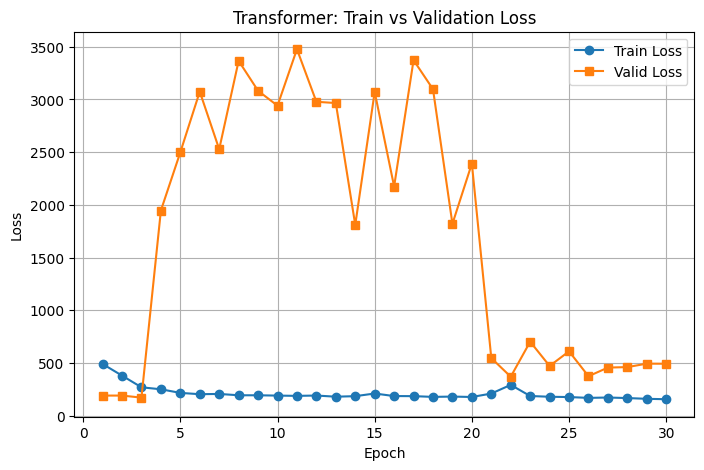

In [21]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# Hyperparameters
input_dim = len(sensor_features)  # Same as input_size
model_dim = 128
num_heads = 4
num_layers = 2
dropout = 0.1
batch_size = 64
epochs = 30
learning_rate = 1e-3

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

# Model, Loss, Optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TransformerRegressor(input_dim=input_dim, model_dim=model_dim,
                              num_heads=num_heads, num_layers=num_layers,
                              dropout=dropout).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
train_losses = []
valid_losses = []

for epoch in range(epochs):
    model.train()
    epoch_train_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device).squeeze()

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs.squeeze(), y_batch)  # ⬅️ Make sure shape matches
        loss.backward()
        optimizer.step()

        epoch_train_loss += loss.item() * X_batch.size(0)

    avg_train_loss = epoch_train_loss / len(train_loader.dataset)
    train_losses.append(avg_train_loss)

    # Validation
    model.eval()
    epoch_valid_loss = 0.0
    with torch.no_grad():
        for X_batch, y_batch in valid_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device).squeeze()

            outputs = model(X_batch)
            loss = criterion(outputs.squeeze(), y_batch)  # ⬅️ Again, matching shape
            epoch_valid_loss += loss.item() * X_batch.size(0)

    avg_valid_loss = epoch_valid_loss / len(valid_loader.dataset)
    valid_losses.append(avg_valid_loss)

    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Valid Loss: {avg_valid_loss:.4f}")

# Plot
plt.figure(figsize=(8,5))
plt.plot(range(1, epochs+1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, epochs+1), valid_losses, label='Valid Loss', marker='s')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Transformer: Train vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


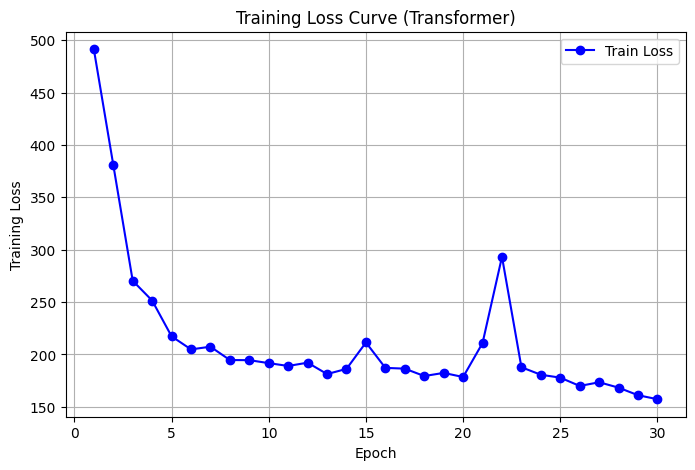

In [22]:
# Plot only Train Loss curve
plt.figure(figsize=(8,5))
plt.plot(range(1, epochs+1), train_losses, label='Train Loss', marker='o', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Curve (Transformer)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Many to One Forecasting Mamba-Base
class MambaTSF(nn.Module):
    def __init__(self, input_size, d_model=64, d_state=128, d_conv=4, expand=2):
        super(MambaTSF, self).__init__()
        self.input_proj = nn.Linear(input_size, d_model)
        self.mamba = Mamba(
            d_model=d_model,
            d_state=d_state,
            d_conv=d_conv,
            expand=expand
        )
        self.layernorm = nn.LayerNorm(d_model)
        self.linear = nn.Linear(d_model, int(input_size/4))

# Categorical


In [1]:
import pandas as pd

# Load the CSV
file_path = r'C:\Users\ASUS\Desktop\SCANIA\2024-34-2\2024-34-2\data\train_specifications.csv'
df = pd.read_csv(file_path)

# Define the Spec columns
spec_columns = [col for col in df.columns if col.startswith('Spec')]

# Check unique values and nulls
for col in spec_columns:
    print(f"Column: {col}")
    print("Unique values:", df[col].unique())
    print("Number of nulls:", df[col].isnull().sum())
    print("-" * 50)


Column: Spec_0
Unique values: ['Cat0' 'Cat1' 'Cat2']
Number of nulls: 0
--------------------------------------------------
Column: Spec_1
Unique values: ['Cat0' 'Cat1' 'Cat2' 'Cat4' 'Cat5' 'Cat3' 'Cat6' 'Cat7' 'Cat8' 'Cat10'
 'Cat11' 'Cat9' 'Cat12' 'Cat13' 'Cat14' 'Cat15' 'Cat16' 'Cat17' 'Cat18'
 'Cat19' 'Cat21' 'Cat22' 'Cat24' 'Cat20' 'Cat26' 'Cat23' 'Cat25' 'Cat27'
 'Cat28']
Number of nulls: 0
--------------------------------------------------
Column: Spec_2
Unique values: ['Cat0' 'Cat1' 'Cat2' 'Cat3' 'Cat4' 'Cat5' 'Cat6' 'Cat7' 'Cat8' 'Cat10'
 'Cat11' 'Cat12' 'Cat9' 'Cat13' 'Cat14' 'Cat15' 'Cat16' 'Cat17' 'Cat18'
 'Cat19' 'Cat20']
Number of nulls: 0
--------------------------------------------------
Column: Spec_3
Unique values: ['Cat0' 'Cat1' 'Cat2' 'Cat3']
Number of nulls: 0
--------------------------------------------------
Column: Spec_4
Unique values: ['Cat0' 'Cat1']
Number of nulls: 0
--------------------------------------------------
Column: Spec_5
Unique values: ['Cat0' 'Cat

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the CSV
file_path = r'C:\Users\ASUS\Desktop\SCANIA\2024-34-2\2024-34-2\data\train_specifications.csv'
df = pd.read_csv(file_path)

# Define specification columns
spec_columns = [col for col in df.columns if col.startswith('Spec')]

# Create a folder to save plots (optional)
output_folder = "vehicle_spec_plots"
os.makedirs(output_folder, exist_ok=True)

# Iterate over each vehicle_id and plot its specifications
for idx, row in df.iterrows():
    vehicle_id = row['vehicle_id']
    specs = row[spec_columns]
    
    plt.figure(figsize=(10, 4))
    plt.bar(spec_columns, [str(x) for x in specs], color='skyblue')
    plt.title(f"Specifications for Vehicle ID: {vehicle_id}")
    plt.xticks(rotation=45)
    plt.ylabel("Specification Value")
    
    # Save or show


C:\Users\ASUS\AppData\Local\Temp\ipykernel_23236\1575972868.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 4))


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


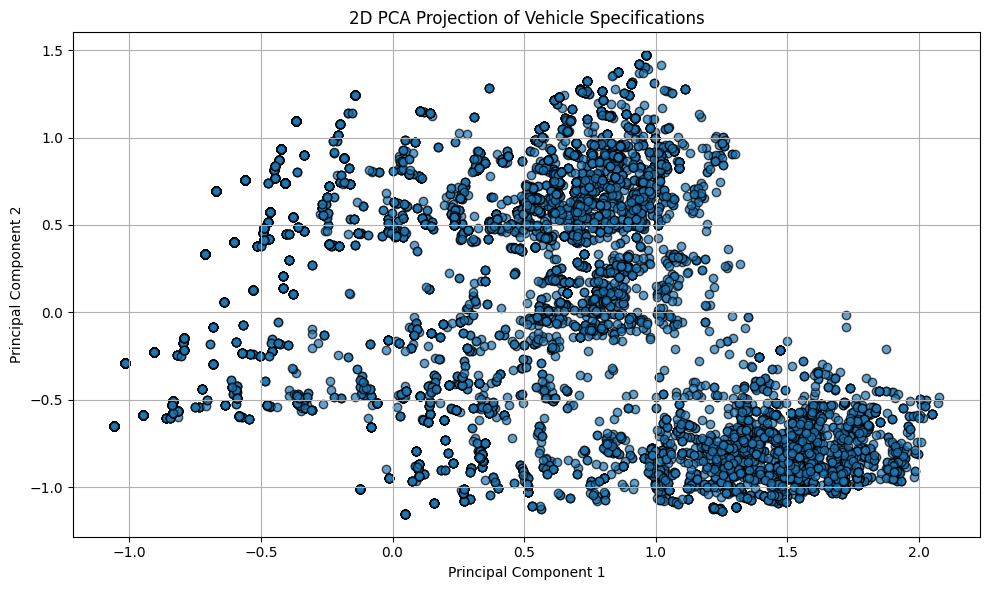

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Load the data
file_path = r'C:\Users\ASUS\Desktop\SCANIA\2024-34-2\2024-34-2\data\train_specifications.csv'
df = pd.read_csv(file_path)

# Select Spec columns
spec_columns = [col for col in df.columns if col.startswith('Spec')]
spec_data = df[spec_columns]

# One-hot encode the categorical specs
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
spec_encoded = encoder.fit_transform(spec_data)

# Apply PCA
pca = PCA(n_components=2)
spec_pca = pca.fit_transform(spec_encoded)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(spec_pca, columns=['PC1', 'PC2'])
pca_df['vehicle_id'] = df['vehicle_id']

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7, edgecolors='k')
plt.title("2D PCA Projection of Vehicle Specifications")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


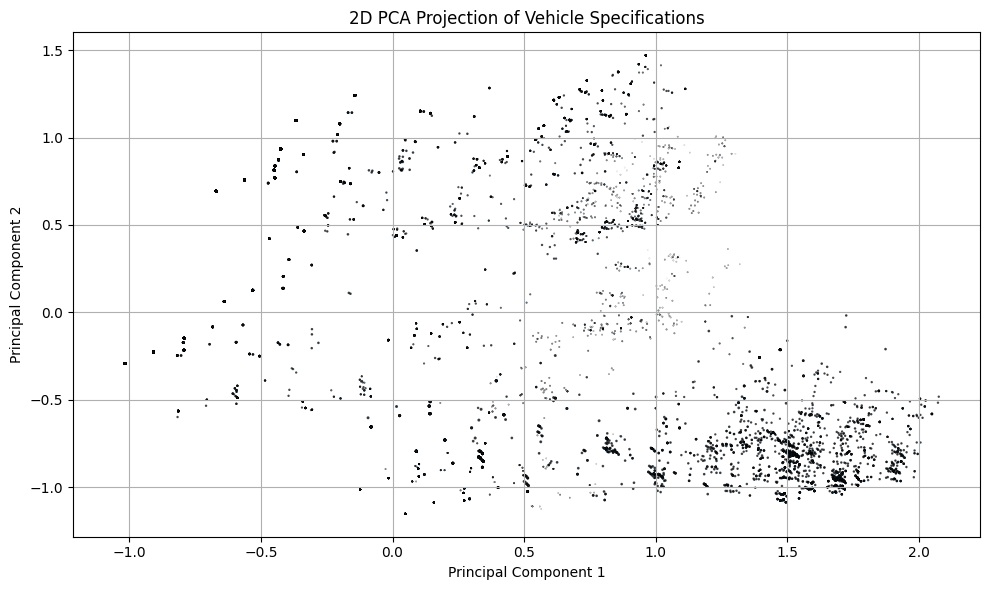

In [5]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Load the data
file_path = r'C:\Users\ASUS\Desktop\SCANIA\2024-34-2\2024-34-2\data\train_specifications.csv'
df = pd.read_csv(file_path)

# Select Spec columns
spec_columns = [col for col in df.columns if col.startswith('Spec')]
spec_data = df[spec_columns]

# One-hot encode the categorical specs
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
spec_encoded = encoder.fit_transform(spec_data)

# for i in range(3,10,1):
pca = PCA(n_components=3)
spec_pca = pca.fit_transform(spec_encoded)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(spec_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['vehicle_id'] = df['vehicle_id']

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], alpha=0.7, edgecolors='k')
plt.title("2D PCA Projection of Vehicle Specifications")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


In [2]:
pip install umap

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3550 sha256=8ff2bbb50a6ed3898e1fd011986fe6aaea47ffee4b6a744b263cff1d722711d2
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\82\d8\73\e9eb3334baaad795ff0278363ff1aca7568bdf2793e452a527
Successfully built umap
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: Building 'umap' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'umap'. Discussion can be found at https://github.com/pypa/pip/issues/6334


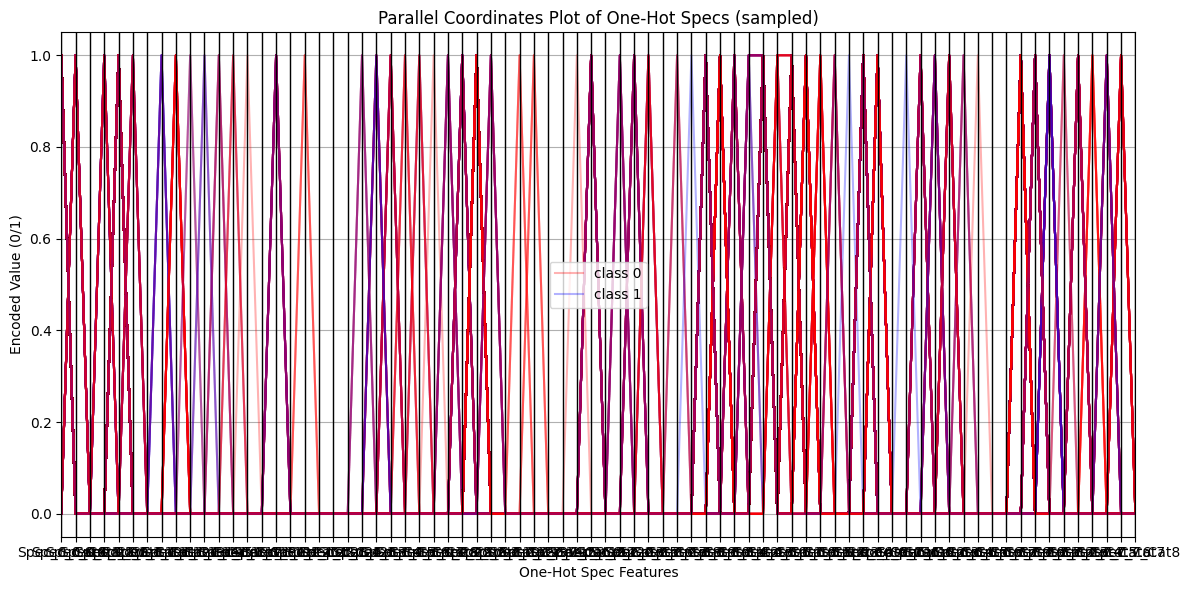

In [6]:
# 8. Parallel coordinates (sampling if you have many vehicles)
#    This uses the encoded features; it can get busy if you have thousands of rows.
#    We’ll sample up to 500 vehicles for readability.
df_pc = pd.DataFrame(X_encoded, columns=feature_names)
df_pc['class_label'] = df['class_label'].astype(str)
df_pc['vehicle_id']   = df['vehicle_id']

# sample
df_sample = df_pc.sample(n=min(500, len(df_pc)), random_state=42)

plt.figure(figsize=(12,6))
parallel_coordinates(
    df_sample.drop(columns='vehicle_id'),
    class_column='class_label',
    color=['red','blue'],
    alpha=0.3
)
plt.title('Parallel Coordinates Plot of One-Hot Specs (sampled)')
plt.xlabel('One-Hot Spec Features')
plt.ylabel('Encoded Value (0/1)')
plt.legend(['class 0','class 1'])
plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset

# Features to include in X
sensor_features = [
    '171_0', '666_0', '427_0', '837_0', '167_0', '167_1', '167_2', '167_3', '167_4', '167_5', '167_6', '167_7',
    '167_8', '167_9', '309_0', '272_0', '272_1', '272_2', '272_3', '272_4', '272_5', '272_6', '272_7', '272_8', '272_9',
    '835_0', '370_0', '291_0', '291_1', '291_2', '291_3', '291_4', '291_5', '291_6', '291_7', '291_8', '291_9', '291_10',
    '158_0', '158_1', '158_2', '158_3', '158_4', '158_5', '158_6', '158_7', '158_8', '158_9', '100_0',
    '459_0', '459_1', '459_2', '459_3', '459_4', '459_5', '459_6', '459_7', '459_8', '459_9', '459_10', '459_11',
    '459_12', '459_13', '459_14', '459_15', '459_16', '459_17', '459_18', '459_19',
    '397_0', '397_1', '397_2', '397_3', '397_4', '397_5', '397_6', '397_7', '397_8', '397_9',
    '397_10', '397_11', '397_12', '397_13', '397_14', '397_15', '397_16', '397_17', '397_18', '397_19',
    '397_20', '397_21', '397_22', '397_23', '397_24', '397_25', '397_26', '397_27', '397_28', '397_29',
    '397_30', '397_31', '397_32', '397_33', '397_34', '397_35'
]

def create_X_y(csv_path, context=70, verbose=True):
    df = pd.read_csv(csv_path)
    X = []
    y = []
    
    for vehicle_id, group in df.groupby('vehicle_id'):
        group = group.sort_values('time_step')
        data = group[sensor_features].values
        rul = group['RUL'].values

        if len(data) < context:
            if verbose:
                print(f"Skipping vehicle_id {vehicle_id} due to insufficient length ({len(data)}<{context})")
            continue

        for i in range(len(data) - context + 1):
            X.append(data[i:i+context])
            y.append(rul[i+context-1])  # Predict RUL at the end of the sequence

    print(f"Total sequences: {len(X)}, Shape of each input: {np.array(X[0]).shape}")
    return X, y

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        assert len(X) == len(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return torch.FloatTensor(self.X[idx]), torch.FloatTensor([self.y[idx]])

# Example usage
csv_path = r"C:\Users\ASUS\Desktop\SCANIA\2024-34-2\Code\super_same_norm.csv"
X_train, y_train = create_X_y(csv_path, context=70)
train_dataset = TimeSeriesDataset(X_train, y_train)


Skipping vehicle_id 22 due to insufficient length (51<70)
Skipping vehicle_id 29 due to insufficient length (44<70)
Skipping vehicle_id 67 due to insufficient length (57<70)
Skipping vehicle_id 75 due to insufficient length (56<70)
Skipping vehicle_id 79 due to insufficient length (38<70)
Skipping vehicle_id 95 due to insufficient length (32<70)
Skipping vehicle_id 186 due to insufficient length (9<70)
Skipping vehicle_id 246 due to insufficient length (66<70)
Skipping vehicle_id 336 due to insufficient length (61<70)
Skipping vehicle_id 351 due to insufficient length (69<70)
Skipping vehicle_id 358 due to insufficient length (30<70)
Skipping vehicle_id 368 due to insufficient length (27<70)
Skipping vehicle_id 370 due to insufficient length (66<70)
Skipping vehicle_id 386 due to insufficient length (48<70)
Skipping vehicle_id 410 due to insufficient length (43<70)
Skipping vehicle_id 430 due to insufficient length (68<70)
Skipping vehicle_id 457 due to insufficient length (19<70)
Skip

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import torch

# 1. Load your spec data
spec_df = pd.read_csv(r"C:\Users\ASUS\Desktop\SCANIA\2024-34-2\2024-34-2\data\train_specifications.csv")

# 2. One-hot encode categorical columns
cat_cols = ['Spec_0', 'Spec_1', 'Spec_2', 'Spec_3', 'Spec_4', 'Spec_5', 'Spec_6', 'Spec_7']
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_specs = encoder.fit_transform(spec_df[cat_cols])

# 3. Suppose you already have your sensor data loaded as:
# X_sensor.shape => [num_samples, time_steps, num_features]
# And it has vehicle_id in the same order or mappable to spec_df
# You must ensure the vehicle_ids align correctly with your main dataset
# For now, assume you have a matching array `X_sensor` and want to concatenate:

# Example:
# Convert to NumPy arrays
X_train = np.array(X_train)  # shape: (num_samples, context_length, num_sensor_features)
y_train = np.array(y_train)

# Continue as before
encoded_specs_expanded = np.expand_dims(encoded_specs, axis=1)
encoded_specs_expanded = np.repeat(encoded_specs_expanded, X_train.shape[1], axis=1)

# Now concatenate
X_combined = np.concatenate([X_train, encoded_specs_expanded], axis=2)

# Convert to torch tensors
X_train_tensor = torch.tensor(X_combined, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)



C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 6553 and the array at index 1 has size 23550

# AUTOENCODER

# TEST

In [44]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset

# Features to include in X
sensor_features = [
    '171_0', '666_0', '427_0', '837_0', '167_0', '167_1', '167_2', '167_3', '167_4', '167_5', '167_6', '167_7',
    '167_8', '167_9', '309_0', '272_0', '272_1', '272_2', '272_3', '272_4', '272_5', '272_6', '272_7', '272_8', '272_9',
    '835_0', '370_0', '291_0', '291_1', '291_2', '291_3', '291_4', '291_5', '291_6', '291_7', '291_8', '291_9', '291_10',
    '158_0', '158_1', '158_2', '158_3', '158_4', '158_5', '158_6', '158_7', '158_8', '158_9', '100_0',
    '459_0', '459_1', '459_2', '459_3', '459_4', '459_5', '459_6', '459_7', '459_8', '459_9', '459_10', '459_11',
    '459_12', '459_13', '459_14', '459_15', '459_16', '459_17', '459_18', '459_19',
    '397_0', '397_1', '397_2', '397_3', '397_4', '397_5', '397_6', '397_7', '397_8', '397_9',
    '397_10', '397_11', '397_12', '397_13', '397_14', '397_15', '397_16', '397_17', '397_18', '397_19',
    '397_20', '397_21', '397_22', '397_23', '397_24', '397_25', '397_26', '397_27', '397_28', '397_29',
    '397_30', '397_31', '397_32', '397_33', '397_34', '397_35'
]

def create_X_y(csv_path, context=70, verbose=True):
    df = pd.read_csv(csv_path)
    X = []
    y = []
    
    for vehicle_id, group in df.groupby('vehicle_id'):
        group = group.sort_values('time_step')
        data = group[sensor_features].values
        rul = group['RUL'].values

        if len(data) < context:
            if verbose:
                print(f"Skipping vehicle_id {vehicle_id} due to insufficient length ({len(data)}<{context})")
            continue

        for i in range(len(data) - context + 1):
            X.append(data[i:i+context])
            y.append(rul[i+context-1])  # Predict RUL at the end of the sequence

    print(f"Total sequences: {len(X)}, Shape of each input: {np.array(X[0]).shape}")
    return X, y

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        assert len(X) == len(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return torch.FloatTensor(self.X[idx]), torch.FloatTensor([self.y[idx]])

# Example usage
csv_path = r"C:\Users\ASUS\Desktop\SCANIA\2024-34-2\Code\super_same_norm.csv"
X_train, y_train = create_X_y(csv_path, context=70)
train_dataset = TimeSeriesDataset(X_train, y_train)


Skipping vehicle_id 22 due to insufficient length (51<70)
Skipping vehicle_id 29 due to insufficient length (44<70)
Skipping vehicle_id 67 due to insufficient length (57<70)
Skipping vehicle_id 75 due to insufficient length (56<70)
Skipping vehicle_id 79 due to insufficient length (38<70)
Skipping vehicle_id 95 due to insufficient length (32<70)
Skipping vehicle_id 186 due to insufficient length (9<70)
Skipping vehicle_id 246 due to insufficient length (66<70)
Skipping vehicle_id 336 due to insufficient length (61<70)
Skipping vehicle_id 351 due to insufficient length (69<70)
Skipping vehicle_id 358 due to insufficient length (30<70)
Skipping vehicle_id 368 due to insufficient length (27<70)
Skipping vehicle_id 370 due to insufficient length (66<70)
Skipping vehicle_id 386 due to insufficient length (48<70)
Skipping vehicle_id 410 due to insufficient length (43<70)
Skipping vehicle_id 430 due to insufficient length (68<70)
Skipping vehicle_id 457 due to insufficient length (19<70)
Skip

In [45]:
from sklearn.preprocessing import OneHotEncoder

# Load categorical specs
spec_df = pd.read_csv(r"C:\Users\ASUS\Desktop\SCANIA\2024-34-2\filtered_train_specifications.csv")

# Drop vehicle_id after using it for indexing
vehicle_ids = spec_df['vehicle_id'].values
spec_df = spec_df.set_index('vehicle_id')

# One-hot encode
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_specs = encoder.fit_transform(spec_df)

# Convert back to DataFrame for easier merging
encoded_df = pd.DataFrame(encoded_specs, index=spec_df.index)



C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [46]:
def create_X_y(csv_path, cat_encoded_df, context=70, verbose=True):
    df = pd.read_csv(csv_path)
    X = []
    y = []

    for vehicle_id, group in df.groupby('vehicle_id'):
        group = group.sort_values('time_step')
        data = group[sensor_features].values
        rul = group['RUL'].values

        if len(data) < context:
            if verbose:
                print(f"Skipping vehicle_id {vehicle_id} due to insufficient length ({len(data)}<{context})")
            continue

        # Get categorical encoding vector for the vehicle
        if vehicle_id not in cat_encoded_df.index:
            if verbose:
                print(f"Skipping vehicle_id {vehicle_id} due to missing categorical data")
            continue

        cat_vec = cat_encoded_df.loc[vehicle_id].values.astype(np.float32)

        for i in range(len(data) - context + 1):
            seq = data[i:i+context]
            # Expand cat_vec across the sequence: same cat_vec for all time steps
            cat_seq = np.repeat(cat_vec[np.newaxis, :], context, axis=0)
            full_seq = np.concatenate([seq, cat_seq], axis=1)  # shape: (context, num_sensors + cat_features)
            X.append(full_seq)
            y.append(rul[i+context-1])

    print(f"Total sequences: {len(X)}, Shape of each input: {np.array(X[0]).shape}")
    return X, y


In [47]:
csv_path = r"C:\Users\ASUS\Desktop\SCANIA\2024-34-2\Code\super_same_norm.csv"
spec_path = r"C:\Users\ASUS\Desktop\SCANIA\2024-34-2\filtered_train_specifications.csv"

# Load categorical and encode
spec_df = pd.read_csv(spec_path)
vehicle_ids = spec_df['vehicle_id'].values
spec_df = spec_df.set_index('vehicle_id')
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_specs = encoder.fit_transform(spec_df)
encoded_df = pd.DataFrame(encoded_specs, index=spec_df.index)

# Create sequences
X_train, y_train = create_X_y(csv_path, encoded_df, context=70)
train_dataset = TimeSeriesDataset(X_train, y_train)


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Skipping vehicle_id 22 due to insufficient length (51<70)
Skipping vehicle_id 29 due to insufficient length (44<70)
Skipping vehicle_id 67 due to insufficient length (57<70)
Skipping vehicle_id 75 due to insufficient length (56<70)
Skipping vehicle_id 79 due to insufficient length (38<70)
Skipping vehicle_id 95 due to insufficient length (32<70)
Skipping vehicle_id 186 due to insufficient length (9<70)
Skipping vehicle_id 246 due to insufficient length (66<70)
Skipping vehicle_id 336 due to insufficient length (61<70)
Skipping vehicle_id 351 due to insufficient length (69<70)
Skipping vehicle_id 358 due to insufficient length (30<70)
Skipping vehicle_id 368 due to insufficient length (27<70)
Skipping vehicle_id 370 due to insufficient length (66<70)
Skipping vehicle_id 386 due to insufficient length (48<70)
Skipping vehicle_id 410 due to insufficient length (43<70)
Skipping vehicle_id 430 due to insufficient length (68<70)
Skipping vehicle_id 457 due to insufficient length (19<70)
Skip

In [31]:
import torch
import torch.nn as nn

class TransformerRULModel(nn.Module):
    def __init__(self, input_dim, d_model=128, nhead=8, num_layers=3, dim_feedforward=256, dropout=0.1):
        super(TransformerRULModel, self).__init__()
        self.input_proj = nn.Linear(input_dim, d_model)

        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=nhead,
            dim_feedforward=dim_feedforward,
            dropout=dropout,
            batch_first=True  # Needed to keep shape (B, T, E)
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.pool = nn.AdaptiveAvgPool1d(1)  # Reduce sequence dimension
        self.regressor = nn.Sequential(
            nn.Linear(d_model, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):  # x shape: (batch, seq_len, input_dim)
        x = self.input_proj(x)  # -> (batch, seq_len, d_model)
        x = self.transformer_encoder(x)  # -> (batch, seq_len, d_model)
        x = x.mean(dim=1)  # Average pooling across time
        return self.regressor(x).squeeze(1)  # -> (batch,)


In [32]:
from torch.utils.data import DataLoader
import torch.optim as optim

# Hyperparameters
input_dim = len(sensor_features) + encoded_df.shape[1]
batch_size = 64
num_epochs = 20
lr = 1e-3

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Model, Loss, Optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TransformerRULModel(input_dim=input_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)


In [33]:
for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0

    for batch_x, batch_y in train_loader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device).squeeze(1)

        optimizer.zero_grad()
        preds = model(batch_x)
        loss = criterion(preds, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * batch_x.size(0)

    avg_loss = total_loss / len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")


Epoch 1/20, Loss: 474.3923
Epoch 2/20, Loss: 271.1543
Epoch 3/20, Loss: 173.2444
Epoch 4/20, Loss: 104.3956
Epoch 5/20, Loss: 93.4606
Epoch 6/20, Loss: 71.5818
Epoch 7/20, Loss: 67.3075
Epoch 8/20, Loss: 54.5372
Epoch 9/20, Loss: 47.8510
Epoch 10/20, Loss: 49.6484
Epoch 11/20, Loss: 46.7171
Epoch 12/20, Loss: 40.4402
Epoch 13/20, Loss: 31.8904
Epoch 14/20, Loss: 29.1714
Epoch 15/20, Loss: 28.6057
Epoch 16/20, Loss: 21.1360
Epoch 17/20, Loss: 18.5703
Epoch 18/20, Loss: 22.2090
Epoch 19/20, Loss: 21.3628
Epoch 20/20, Loss: 14.8403


In [34]:
def evaluate(model, dataloader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for x, y in dataloader:
            x, y = x.to(device), y.to(device).squeeze(1)
            preds = model(x)
            loss = criterion(preds, y)
            total_loss += loss.item() * x.size(0)
    return total_loss / len(dataloader.dataset)


In [35]:
evaluate(model, train_loader)

16.902474086848212

# TAB TRANSFORMER

In [58]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset

# Features to include in X
sensor_features = [
    '171_0', '666_0', '427_0', '837_0', '167_0', '167_1', '167_2', '167_3', '167_4', '167_5', '167_6', '167_7',
    '167_8', '167_9', '309_0', '272_0', '272_1', '272_2', '272_3', '272_4', '272_5', '272_6', '272_7', '272_8', '272_9',
    '835_0', '370_0', '291_0', '291_1', '291_2', '291_3', '291_4', '291_5', '291_6', '291_7', '291_8', '291_9', '291_10',
    '158_0', '158_1', '158_2', '158_3', '158_4', '158_5', '158_6', '158_7', '158_8', '158_9', '100_0',
    '459_0', '459_1', '459_2', '459_3', '459_4', '459_5', '459_6', '459_7', '459_8', '459_9', '459_10', '459_11',
    '459_12', '459_13', '459_14', '459_15', '459_16', '459_17', '459_18', '459_19',
    '397_0', '397_1', '397_2', '397_3', '397_4', '397_5', '397_6', '397_7', '397_8', '397_9',
    '397_10', '397_11', '397_12', '397_13', '397_14', '397_15', '397_16', '397_17', '397_18', '397_19',
    '397_20', '397_21', '397_22', '397_23', '397_24', '397_25', '397_26', '397_27', '397_28', '397_29',
    '397_30', '397_31', '397_32', '397_33', '397_34', '397_35'
]

def create_X_y(csv_path, context=70, verbose=True):
    df = pd.read_csv(csv_path)
    X = []
    y = []
    
    for vehicle_id, group in df.groupby('vehicle_id'):
        group = group.sort_values('time_step')
        data = group[sensor_features].values
        rul = group['RUL'].values

        if len(data) < context:
            if verbose:
                print(f"Skipping vehicle_id {vehicle_id} due to insufficient length ({len(data)}<{context})")
            continue

        for i in range(len(data) - context + 1):
            X.append(data[i:i+context])
            y.append(rul[i+context-1])  # Predict RUL at the end of the sequence

    print(f"Total sequences: {len(X)}, Shape of each input: {np.array(X[0]).shape}")
    return X, y

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        assert len(X) == len(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return torch.FloatTensor(self.X[idx]), torch.FloatTensor([self.y[idx]])

# Example usage
csv_path = r"C:\Users\ASUS\Desktop\SCANIA\2024-34-2\Code\super_same_norm.csv"
X_train, y_train = create_X_y(csv_path, context=70)
train_dataset = TimeSeriesDataset(X_train, y_train)


Skipping vehicle_id 22 due to insufficient length (51<70)
Skipping vehicle_id 29 due to insufficient length (44<70)
Skipping vehicle_id 67 due to insufficient length (57<70)
Skipping vehicle_id 75 due to insufficient length (56<70)
Skipping vehicle_id 79 due to insufficient length (38<70)
Skipping vehicle_id 95 due to insufficient length (32<70)
Skipping vehicle_id 186 due to insufficient length (9<70)
Skipping vehicle_id 246 due to insufficient length (66<70)
Skipping vehicle_id 336 due to insufficient length (61<70)
Skipping vehicle_id 351 due to insufficient length (69<70)
Skipping vehicle_id 358 due to insufficient length (30<70)
Skipping vehicle_id 368 due to insufficient length (27<70)
Skipping vehicle_id 370 due to insufficient length (66<70)
Skipping vehicle_id 386 due to insufficient length (48<70)
Skipping vehicle_id 410 due to insufficient length (43<70)
Skipping vehicle_id 430 due to insufficient length (68<70)
Skipping vehicle_id 457 due to insufficient length (19<70)
Skip

In [48]:
from sklearn.preprocessing import LabelEncoder

cat_cols = [f"Spec_{i}" for i in range(8)]
cat_encoders = {}
cat_unique_counts = []

# Load categorical specs
spec_df = pd.read_csv(r"C:\Users\ASUS\Desktop\SCANIA\2024-34-2\filtered_train_specifications.csv")

# Encode and collect metadata
for col in cat_cols:
    le = LabelEncoder()
    spec_df[col] = le.fit_transform(spec_df[col])
    cat_encoders[col] = le
    cat_unique_counts.append(spec_df[col].nunique())


In [49]:
cont_features = sensor_features  # your ~100 time series features

# Load continuous dataset
cont_df = pd.read_csv(r"C:\Users\ASUS\Desktop\SCANIA\2024-34-2\Code\super_same_norm.csv")
cont_df = cont_df.sort_values(['vehicle_id', 'time_step'])

# Compute mean/std for normalization
cont_stats = cont_df[cont_features].agg(['mean', 'std']).T
cont_mean_std = torch.tensor(cont_stats.values, dtype=torch.float32)  # shape (num_continuous, 2)


In [50]:
from tab_transformer_pytorch import TabTransformer
import torch.nn as nn

model = TabTransformer(
    categories = tuple(cat_unique_counts),     # e.g., (3, 19, 9, 4, 2, 5, 8, 8)
    num_continuous = len(cont_features),       # ~100 features
    dim = 32,
    dim_out = 1,                               # RUL regression
    depth = 6,
    heads = 8,
    attn_dropout = 0.1,
    ff_dropout = 0.1,
    mlp_hidden_mults = (4, 2),
    mlp_act = nn.ReLU(),
    continuous_mean_std = cont_mean_std        # for normalization
)


In [54]:
class TabTransformerDataset(Dataset):
    def __init__(self, spec_df, cont_df, context=70):
        self.X_cat = []  # Categorical features
        self.X_cont = []  # Continuous features (time series)
        self.y = []  # Target (RUL)

        for vid, group in cont_df.groupby("vehicle_id"):
            if vid not in spec_df["vehicle_id"].values:
                continue
            spec_row = spec_df[spec_df["vehicle_id"] == vid][cat_cols].values[0]
            group = group.sort_values("time_step")

            if len(group) < context:
                continue

            data = group[cont_features].values  # Continuous feature values
            rul = group["RUL"].values  # RUL target values

            for i in range(len(data) - context + 1):
                cont_seq = data[i:i+context]  # Slice the sequence for context length
                rul_val = rul[i+context-1]  # Get the RUL value at the end of the sequence
                self.X_cat.append(spec_row)  # Add the categorical feature row
                self.X_cont.append(cont_seq)  # Add the continuous sequence
                self.y.append(rul_val)  # Add the corresponding RUL value

    def __len__(self):
        return len(self.X_cat)  # Number of data points (sequences)

    def __getitem__(self, idx):
        cat = torch.LongTensor(self.X_cat[idx])             # (num_cat,)
        cont = torch.FloatTensor(self.X_cont[idx])          # (context, num_cont)
        target = torch.FloatTensor([self.y[idx]])           # Target: RUL (scalar)
        return cat, cont, target  # Ensure we return 3 elements: cat, cont, and target


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.optim as optim

# Ensure your model is on the correct device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate the model
model = TabTransformer(
    categories=tuple(cat_unique_counts),  # Number of unique categories per column
    num_continuous=len(cont_features),  # Number of continuous features
    dim=32,  # Dimensionality
    dim_out=1,  # For RUL (regression)
    depth=6,  # Depth of transformer
    heads=8,  # Number of attention heads
    attn_dropout=0.1,
    ff_dropout=0.1,
    mlp_hidden_mults=(4, 2),  # Multiplier for hidden layers
    mlp_act=nn.ReLU(),
    continuous_mean_std=cont_mean_std  # For normalizing continuous features
).to(device)

# Instantiate the dataset
train_dataset = TabTransformerDataset(spec_df, cont_df, context=70)

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Loss function and optimizer
criterion = nn.MSELoss()  # Mean squared error for regression task
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training loop
for epoch in range(10):  # Example number of epochs
    model.train()  # Set model to training mode
    running_loss = 0.0

    for cat, cont, target in train_loader:
        cat, cont, target = cat.to(device), cont.to(device), target.to(device)

        optimizer.zero_grad()  # Zero gradients before backward pass

        # Forward pass
        pred = model(cat, cont)  # (batch_size, 1)
        
        # Compute loss
        loss = criterion(pred.squeeze(1), target)  # Remove extra dimension
        loss.backward()  # Backpropagate
        optimizer.step()  # Update weights

        running_loss += loss.item() * cat.size(0)  # Accumulate the loss for batch

    epoch_loss = running_loss / len(train_loader.dataset)  # Average loss for the epoch
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")


AssertionError: you must pass in 105 values for your continuous input

2.

In [2]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset

# Features to include in X
sensor_features = [
    '171_0', '666_0', '427_0', '837_0', '167_0', '167_1', '167_2', '167_3', '167_4', '167_5', '167_6', '167_7',
    '167_8', '167_9', '309_0', '272_0', '272_1', '272_2', '272_3', '272_4', '272_5', '272_6', '272_7', '272_8', '272_9',
    '835_0', '370_0', '291_0', '291_1', '291_2', '291_3', '291_4', '291_5', '291_6', '291_7', '291_8', '291_9', '291_10',
    '158_0', '158_1', '158_2', '158_3', '158_4', '158_5', '158_6', '158_7', '158_8', '158_9', '100_0',
    '459_0', '459_1', '459_2', '459_3', '459_4', '459_5', '459_6', '459_7', '459_8', '459_9', '459_10', '459_11',
    '459_12', '459_13', '459_14', '459_15', '459_16', '459_17', '459_18', '459_19',
    '397_0', '397_1', '397_2', '397_3', '397_4', '397_5', '397_6', '397_7', '397_8', '397_9',
    '397_10', '397_11', '397_12', '397_13', '397_14', '397_15', '397_16', '397_17', '397_18', '397_19',
    '397_20', '397_21', '397_22', '397_23', '397_24', '397_25', '397_26', '397_27', '397_28', '397_29',
    '397_30', '397_31', '397_32', '397_33', '397_34', '397_35'
]
final_vehicle_ids = []

def create_X_y(csv_path, context=70, verbose=True):
    df = pd.read_csv(csv_path)
    X = []
    y = []
    # final_vehicle_ids = []

    for vehicle_id, group in df.groupby('vehicle_id'):
        group = group.sort_values('time_step')
        data = group[sensor_features].values
        rul = group['RUL'].values

        if len(data) < context:
            if verbose:
                print(f"Skipping vehicle_id {vehicle_id} due to insufficient length ({len(data)}<{context})")
            continue
        final_vehicle_ids.append(vehicle_id)
        for i in range(len(data) - context + 1):
            
            X.append(data[i:i+context])
            y.append(rul[i+context-1])  # Predict RUL at the end of the sequence

    print(f"Total sequences: {len(X)}, Shape of each input: {np.array(X[0]).shape}")
    return X, y

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        assert len(X) == len(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return torch.FloatTensor(self.X[idx]), torch.FloatTensor([self.y[idx]])

# Example usage
csv_path = r"C:\Users\ASUS\Desktop\SCANIA\2024-34-2\Code\super_same_norm.csv"
X_train, y_train = create_X_y(csv_path, context=70)
train_dataset = TimeSeriesDataset(X_train, y_train)


Skipping vehicle_id 22 due to insufficient length (51<70)
Skipping vehicle_id 29 due to insufficient length (44<70)
Skipping vehicle_id 67 due to insufficient length (57<70)
Skipping vehicle_id 75 due to insufficient length (56<70)
Skipping vehicle_id 79 due to insufficient length (38<70)
Skipping vehicle_id 95 due to insufficient length (32<70)
Skipping vehicle_id 186 due to insufficient length (9<70)
Skipping vehicle_id 246 due to insufficient length (66<70)
Skipping vehicle_id 336 due to insufficient length (61<70)
Skipping vehicle_id 351 due to insufficient length (69<70)
Skipping vehicle_id 358 due to insufficient length (30<70)
Skipping vehicle_id 368 due to insufficient length (27<70)
Skipping vehicle_id 370 due to insufficient length (66<70)
Skipping vehicle_id 386 due to insufficient length (48<70)
Skipping vehicle_id 410 due to insufficient length (43<70)
Skipping vehicle_id 430 due to insufficient length (68<70)
Skipping vehicle_id 457 due to insufficient length (19<70)
Skip

In [3]:
import pandas as pd

# Load specs
spec_df = pd.read_csv(r"C:\Users\ASUS\Desktop\SCANIA\2024-34-2\filtered_train_specifications.csv")

# Factorize each Spec_i and store mappings
cat_cols = [f"Spec_{i}" for i in range(8)]
factor_maps = {}
cardinalities = []

for col in cat_cols:
    spec_df[col], uniques = pd.factorize(spec_df[col])
    factor_maps[col] = dict(zip(uniques, range(len(uniques))))
    cardinalities.append(len(uniques))

# cardinalities now e.g. (3, 19, 9, 4, 2, 5, 8, 8)


In [12]:
cardinalities

[3, 19, 9, 4, 2, 5, 8, 8]

In [ ]:
import numpy as np
import torch
from torch.utils.data import Dataset

# sensor_features as before...
# cardinalities from above

def create_tabular_X_y(
    cont_csv,
    specs_df,
    context=70
):
    df = pd.read_csv(cont_csv)
    X_cont, X_cat, y = [], [], []

    # merge specs onto continuous data by vehicle_id
    df = df.merge(specs_df[["vehicle_id"] + cat_cols],
                  on="vehicle_id", how="left")

    for vid, grp in df.groupby("vehicle_id"):
        grp = grp.sort_values("time_step")
        data = grp[sensor_features].values
        categ = grp[cat_cols].iloc[0].values.astype(np.int64)
        rul   = grp["RUL"].values

        if len(data) < context:
            print(f"Skipping {vid}: only {len(data)} timesteps")
            continue

        # slide a window over the time series
        for i in range(len(data) - context + 1):
            X_cont.append(data[i : i + context].flatten())  
            # flatten → shape = (context * n_sensors,)
            X_cat.append(categ)  
            y.append(rul[i + context - 1])

    X_cont = np.stack(X_cont)
    X_cat  = np.stack(X_cat)
    y      = np.array(y, dtype=np.float32)

    print("Built:", X_cont.shape, X_cat.shape, y.shape)
    return X_cat, X_cont, y

class TabularTS(Dataset):
    def __init__(self, X_cat, X_cont, y):
        self.X_cat  = torch.LongTensor(X_cat)
        self.X_cont = torch.FloatTensor(X_cont)
        self.y      = torch.FloatTensor(y).unsqueeze(1)

    def __len__(self): return len(self.y)
    
    def __getitem__(self, i):
        try:
            return self.X_cat[i], self.X_cont[i], self.y[i]
        except Exception as e:
            print(f"Error at index {i}: {e}")
            raise

# usage
Xc, Xn, ys = create_tabular_X_y(
    r"C:\Users\ASUS\Desktop\SCANIA\2024-34-2\Code\super_same_norm.csv",
    spec_df,
    context=70
)
ds = TabularTS(Xc, Xn, ys)



In [5]:
import torch.nn as nn
from tab_transformer_pytorch import TabTransformer

n_cont = Xn.shape[1]  # = context * #sensors
model = TabTransformer(
    categories=tuple(cardinalities),  
    num_continuous=n_cont,
    dim=32,
    dim_out=1,
    depth=6,
    heads=8,
    attn_dropout=0.1,
    ff_dropout=0.1,
    mlp_hidden_mults=(4,2),
    mlp_act=nn.ReLU(),
    continuous_mean_std=None    # you can precompute mean/std over Xn and pass here
)


In [6]:
# Note: if you’d like the model to normalize each continuous feature internally, compute
means = Xn.mean(0)
stds  = Xn.std(0)
cont_mean_std = torch.stack([torch.from_numpy(means), torch.from_numpy(stds)], dim=1)
model.continuous_mean_std = cont_mean_std


In [9]:
for x_cat, x_cont, y in loader:
    print(x_cat.shape, x_cont.shape, y.shape)
    break


torch.Size([64, 8]) torch.Size([64, 7350]) torch.Size([64, 1])


In [11]:
print(x_cat.shape)   # should be (N, 8)
print(x_cont.shape)  # should be (N, context * #sensor_features)
print(y.shape)       # should be (N,)


torch.Size([64, 8])
torch.Size([64, 7350])
torch.Size([64, 1])


In [8]:
from torch.utils.data import DataLoader
import torch.optim as optim

loader = DataLoader(ds, batch_size=64, shuffle=True, num_workers=0)
opt    = optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

model.train()
for epoch in range(20):
    total_loss = 0
    for x_cat, x_cont, y in loader:
        pred = model(x_cat, x_cont)
        loss = loss_fn(pred, y)
        opt.zero_grad()
        loss.backward()
        opt.step()
        total_loss += loss.item() * y.size(0)
    print(f"Epoch {epoch:02d} — MSE: {total_loss / len(ds):.4f}")


RuntimeError: mixed dtype (CPU): all inputs must share same datatype.

new

In [ ]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder

# # Load your datasets
# df_cont = pd.read_csv(r"C:\Users\ASUS\Desktop\SCANIA\2024-34-2\Code\super_same_norm.csv")
# df_cat = pd.read_csv(r"C:\Users\ASUS\Desktop\SCANIA\2024-34-2\filtered_train_specifications.csv")

# # Merge on 'vehicle_id'
# df_merged = df_cont.merge(df_cat, on="vehicle_id", how="left")

# # Encode categorical columns
# spec_cols = ['Spec_0', 'Spec_1', 'Spec_2', 'Spec_3', 'Spec_4', 'Spec_5', 'Spec_6', 'Spec_7']
# label_encoders = {}

# for col in spec_cols:
#     le = LabelEncoder()
#     df_merged[col] = le.fit_transform(df_merged[col])
#     label_encoders[col] = le  # Save encoder if needed later

# # (Optional) Save the merged dataset
# df_merged.to_csv(r"C:\Users\ASUS\Desktop\SCANIA\2024-34-2\Code\merged_for_tabtransformer.csv", index=False)

# # Display a preview
# print(df_merged.head())


   vehicle_id  time_step     171_0     666_0     427_0     837_0  167_0  \
0          22        3.2  0.013129  0.000808  0.013639  0.000108    0.0   
1          22        7.4  0.012836  0.002263  0.012233  0.000449    0.0   
2          22       10.8  0.007137  0.001174  0.006852  0.000374    0.0   
3          22       12.2  0.002236  0.000279  0.002128  0.000089    0.0   
4          22       17.2  0.013189  0.002301  0.012619  0.000675    0.0   

   167_1  167_2  167_3  ...  class_label  RUL  Spec_0  Spec_1  Spec_2  Spec_3  \
0    0.0    0.0    0.0  ...            0   51       3      19       9       4   
1    0.0    0.0    0.0  ...            0   50       3      19       9       4   
2    0.0    0.0    0.0  ...            0   49       3      19       9       4   
3    0.0    0.0    0.0  ...            1   48       3      19       9       4   
4    0.0    0.0    0.0  ...            1   47       3      19       9       4   

   Spec_4  Spec_5  Spec_6  Spec_7  
0       2       5       8 

In [15]:
import pandas as pd

# Load the CSV file
file_path = r"C:\Users\ASUS\Desktop\SCANIA\2024-34-2\Code\merged_for_tabtransformer.csv"
df = pd.read_csv(file_path)

# Drop the columns
columns_to_delete = ["in_study_repair", "row_number", "class_label"]
df.drop(columns=columns_to_delete, inplace=True)

# Save the modified 
# CSV
df.to_csv(file_path, index=False)

print("Columns deleted successfully!")

Columns deleted successfully!


In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\ASUS\Desktop\SCANIA\2024-34-2\Code\super_same_norm.csv")

# Extract unique values from the 'vehicle_id' column and store them in an array
unique_vehicle_ids = df["vehicle_id"].unique()

# Display the array
print(unique_vehicle_ids)

[   22    27    29 ... 33467 33472 33528]


In [3]:
type(unique_vehicle_ids)
list(unique_vehicle_ids)

[22,
 27,
 29,
 52,
 61,
 67,
 75,
 79,
 84,
 87,
 95,
 114,
 116,
 134,
 139,
 161,
 185,
 186,
 197,
 206,
 228,
 234,
 237,
 241,
 246,
 255,
 269,
 273,
 300,
 310,
 336,
 346,
 351,
 358,
 368,
 370,
 375,
 376,
 384,
 386,
 410,
 430,
 457,
 467,
 482,
 485,
 490,
 522,
 540,
 550,
 552,
 563,
 604,
 605,
 629,
 638,
 646,
 657,
 682,
 690,
 691,
 693,
 721,
 734,
 738,
 739,
 744,
 760,
 775,
 779,
 785,
 791,
 797,
 817,
 820,
 821,
 823,
 834,
 839,
 840,
 841,
 842,
 844,
 845,
 890,
 893,
 897,
 898,
 927,
 953,
 956,
 958,
 968,
 971,
 998,
 1012,
 1013,
 1014,
 1026,
 1032,
 1042,
 1044,
 1055,
 1056,
 1057,
 1076,
 1089,
 1101,
 1104,
 1123,
 1127,
 1132,
 1134,
 1155,
 1157,
 1158,
 1159,
 1160,
 1167,
 1173,
 1177,
 1181,
 1190,
 1194,
 1198,
 1201,
 1203,
 1206,
 1210,
 1211,
 1223,
 1225,
 1232,
 1239,
 1243,
 1245,
 1246,
 1257,
 1278,
 1300,
 1301,
 1306,
 1309,
 1314,
 1321,
 1326,
 1343,
 1354,
 1362,
 1372,
 1374,
 1378,
 1379,
 1380,
 1383,
 1387,
 1393,
 1398,


In [6]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset

# Features to include in X
sensor_features = [
    '171_0', '666_0', '427_0', '837_0', '167_0', '167_1', '167_2', '167_3', '167_4', '167_5', '167_6', '167_7',
    '167_8', '167_9', '309_0', '272_0', '272_1', '272_2', '272_3', '272_4', '272_5', '272_6', '272_7', '272_8', '272_9',
    '835_0', '370_0', '291_0', '291_1', '291_2', '291_3', '291_4', '291_5', '291_6', '291_7', '291_8', '291_9', '291_10',
    '158_0', '158_1', '158_2', '158_3', '158_4', '158_5', '158_6', '158_7', '158_8', '158_9', '100_0',
    '459_0', '459_1', '459_2', '459_3', '459_4', '459_5', '459_6', '459_7', '459_8', '459_9', '459_10', '459_11',
    '459_12', '459_13', '459_14', '459_15', '459_16', '459_17', '459_18', '459_19',
    '397_0', '397_1', '397_2', '397_3', '397_4', '397_5', '397_6', '397_7', '397_8', '397_9',
    '397_10', '397_11', '397_12', '397_13', '397_14', '397_15', '397_16', '397_17', '397_18', '397_19',
    '397_20', '397_21', '397_22', '397_23', '397_24', '397_25', '397_26', '397_27', '397_28', '397_29',
    '397_30', '397_31', '397_32', '397_33', '397_34', '397_35'
]
final_vehicle_ids = []

def create_X_y(csv_path, context=70, verbose=True):
    df = pd.read_csv(csv_path)
    X = []
    y = []
    # final_vehicle_ids = []

    for vehicle_id, group in df.groupby('vehicle_id'):
        group = group.sort_values('time_step')
        data = group[sensor_features].values
        rul = group['RUL'].values

        if len(data) < context:
            if verbose:
                print(f"Skipping vehicle_id {vehicle_id} due to insufficient length ({len(data)}<{context})")
            continue
        final_vehicle_ids.append(vehicle_id)
        for i in range(len(data) - context + 1):
            
            X.append(data[i:i+context])
            y.append(rul[i+context-1])  # Predict RUL at the end of the sequence

    print(f"Total sequences: {len(X)}, Shape of each input: {np.array(X[0]).shape}")
    return X, y

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        assert len(X) == len(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return torch.FloatTensor(self.X[idx]), torch.FloatTensor([self.y[idx]])

# Example usage
csv_path = r"C:\Users\ASUS\Desktop\SCANIA\2024-34-2\Code\super_same_norm.csv"
X_train, y_train = create_X_y(csv_path, context=70)
train_dataset = TimeSeriesDataset(X_train, y_train)


Skipping vehicle_id 22 due to insufficient length (51<70)
Skipping vehicle_id 29 due to insufficient length (44<70)
Skipping vehicle_id 67 due to insufficient length (57<70)
Skipping vehicle_id 75 due to insufficient length (56<70)
Skipping vehicle_id 79 due to insufficient length (38<70)
Skipping vehicle_id 95 due to insufficient length (32<70)
Skipping vehicle_id 186 due to insufficient length (9<70)
Skipping vehicle_id 246 due to insufficient length (66<70)
Skipping vehicle_id 336 due to insufficient length (61<70)
Skipping vehicle_id 351 due to insufficient length (69<70)
Skipping vehicle_id 358 due to insufficient length (30<70)
Skipping vehicle_id 368 due to insufficient length (27<70)
Skipping vehicle_id 370 due to insufficient length (66<70)
Skipping vehicle_id 386 due to insufficient length (48<70)
Skipping vehicle_id 410 due to insufficient length (43<70)
Skipping vehicle_id 430 due to insufficient length (68<70)
Skipping vehicle_id 457 due to insufficient length (19<70)
Skip

In [7]:
final_vehicle_ids

[27,
 52,
 61,
 84,
 87,
 114,
 116,
 134,
 139,
 161,
 185,
 197,
 206,
 228,
 234,
 237,
 241,
 255,
 269,
 273,
 300,
 310,
 346,
 375,
 376,
 384,
 490,
 540,
 550,
 604,
 605,
 690,
 691,
 721,
 739,
 775,
 785,
 791,
 821,
 840,
 841,
 927,
 958,
 971,
 998,
 1014,
 1032,
 1044,
 1101,
 1127,
 1155,
 1167,
 1177,
 1190,
 1194,
 1225,
 1243,
 1246,
 1300,
 1301,
 1306,
 1421,
 1472,
 1516,
 1534,
 1615,
 1635,
 1638,
 1643,
 1644,
 1646,
 1656,
 1659,
 1661,
 1672,
 1709,
 1732,
 1783,
 1787,
 1832,
 1872,
 1876,
 1879,
 1902,
 1922,
 1932,
 1950,
 1968,
 1988,
 1992,
 1998,
 2026,
 2065,
 2078,
 2089,
 2107,
 2122,
 2187,
 2205,
 2211,
 2213,
 2218,
 2248,
 2257,
 2265,
 2313,
 2319,
 2326,
 2366,
 2393,
 2417,
 2442,
 2489,
 2536,
 2624,
 2664,
 2672,
 2794,
 2895,
 2942,
 3081,
 3168,
 3241,
 3271,
 3292,
 3307,
 3401,
 3559,
 3610,
 3727,
 3801,
 3851,
 3857,
 3865,
 3942,
 3946,
 3998,
 4027,
 4030,
 4031,
 4046,
 4072,
 4077,
 4139,
 4149,
 4202,
 4227,
 4237,
 4248,
 4297,


In [8]:
import pandas as pd

# Load the train_specifications CSV file
csv_path = r"C:\Users\ASUS\Desktop\SCANIA\2024-34-2\2024-34-2\data\train_specifications.csv"
df1 = pd.read_csv(csv_path)

# Filter the dataframe to keep only rows where vehicle_id is in final_vehicle_ids
filtered_df = df1[df1["vehicle_id"].isin(final_vehicle_ids)]

# Save the filtered data into a new CSV file
filtered_csv_path = r"C:\Users\ASUS\Desktop\SCANIA\2024-34-2\filtered_train_specifications.csv"
filtered_df.to_csv(filtered_csv_path, index=False)

print(f"Filtered data saved to: {filtered_csv_path}")

Filtered data saved to: C:\Users\ASUS\Desktop\SCANIA\2024-34-2\filtered_train_specifications.csv


In [9]:
import pandas as pd

# Load the CSV
file_path = r'C:\Users\ASUS\Desktop\SCANIA\2024-34-2\filtered_train_specifications.csv'
df = pd.read_csv(file_path)

# Define the Spec columns
spec_columns = [col for col in df.columns if col.startswith('Spec')]

# Check unique values and nulls
for col in spec_columns:
    print(f"Column: {col}")
    print("Unique values:", df[col].unique())
    print("Number of nulls:", df[col].isnull().sum())
    print("-" * 50)


Column: Spec_0
Unique values: ['Cat0' 'Cat1' 'Cat2']
Number of nulls: 0
--------------------------------------------------
Column: Spec_1
Unique values: ['Cat1' 'Cat3' 'Cat5' 'Cat12' 'Cat2' 'Cat0' 'Cat16' 'Cat4' 'Cat10' 'Cat9'
 'Cat6' 'Cat13' 'Cat17' 'Cat7' 'Cat15' 'Cat18' 'Cat23' 'Cat8' 'Cat14']
Number of nulls: 0
--------------------------------------------------
Column: Spec_2
Unique values: ['Cat1' 'Cat2' 'Cat0' 'Cat3' 'Cat5' 'Cat10' 'Cat6' 'Cat8' 'Cat9']
Number of nulls: 0
--------------------------------------------------
Column: Spec_3
Unique values: ['Cat1' 'Cat0' 'Cat2' 'Cat3']
Number of nulls: 0
--------------------------------------------------
Column: Spec_4
Unique values: ['Cat0' 'Cat1']
Number of nulls: 0
--------------------------------------------------
Column: Spec_5
Unique values: ['Cat0' 'Cat1' 'Cat2' 'Cat3' 'Cat4']
Number of nulls: 0
--------------------------------------------------
Column: Spec_6
Unique values: ['Cat0' 'Cat1' 'Cat4' 'Cat2' 'Cat3' 'Cat5' 'Cat9' 'Ca

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load data
file_path = r'C:\Users\ASUS\Desktop\SCANIA\2024-34-2\filtered_train_specifications.csv'
df = pd.read_csv(file_path)

# Select only categorical features
spec_cols = [col for col in df.columns if col.startswith('Spec_')]

# Apply Label Encoding to each categorical feature
label_encoders = {}
for col in spec_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Get number of unique categories per feature
categories = tuple(len(le.classes_) for le in label_encoders.values())
print("Categories tuple:", categories)


Categories tuple: (3, 19, 9, 4, 2, 5, 8, 8)


In [11]:
import torch

# Convert to torch tensor
x_categ = torch.tensor(df[spec_cols].values, dtype=torch.long)  # shape: (num_samples, num_cat_features)

# If you have no continuous features, pass a zero-tensor of shape (num_samples, 0)
x_cont = torch.empty((df.shape[0], 0))


In [14]:
pip install tab_transformer_pytorch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [15]:
from tab_transformer_pytorch import TabTransformer
import torch.nn as nn

# No continuous features, so num_continuous=0, and we skip continuous_mean_std
model = TabTransformer(
    categories = categories,       # from label encodings
    num_continuous = 0,            # no continuous features
    dim = 32,
    dim_out = 1,                   # adjust depending on your task
    depth = 6,
    heads = 8,
    attn_dropout = 0.1,
    ff_dropout = 0.1,
    mlp_hidden_mults = (4, 2),
    mlp_act = nn.ReLU()
)

# Forward pass
pred = model(x_categ, x_cont)   # shape: (batch_size, 1)
print(pred.shape)


torch.Size([365, 1])


try2

In [21]:
category_sizes = [3, 19, 9, 4, 2, 5, 8, 8]  # based on unique values per column


In [22]:
num_continuous = 83  # or whatever subset/statistics of your time series features you choose


In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

cat_cols = [f"Spec_{i}" for i in range(8)]
cat_df = pd.read_csv(r"C:\Users\ASUS\Desktop\SCANIA\2024-34-2\filtered_train_specifications.csv")

# Encode categories
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    cat_df[col] = le.fit_transform(cat_df[col])
    encoders[col] = le


In [24]:
sensor_df = pd.read_csv(r"C:\Users\ASUS\Desktop\SCANIA\2024-34-2\Code\super_same_norm.csv")
sensor_features_subset = sensor_features[:10]  # or select top N features based on importance

# Aggregate per vehicle
agg_df = sensor_df.groupby('vehicle_id')[sensor_features_subset].mean().reset_index()


In [25]:
data = pd.merge(cat_df, agg_df, on='vehicle_id')
categorical_data = data[cat_cols].values
continuous_data = data[sensor_features_subset].values
targets = data['RUL'].values  # Or another label


KeyError: 'RUL'